In [ ]:
## EDA2

In [2]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.4 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=41eef8cdff707c10d1010c3e353b1b3c8b65d82ab338d032468baaea8de4d536
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which i

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/adult_with_headers.csv'
df = pd.read_csv(file_path)

In [2]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
### 1. Data Exploration and Preprocessing ###

# Explore basic information
print("Summary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values - Assuming 'workclass' and 'occupation' may have missing values
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)

Summary Statistics:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Missing Values:
 age               0
workc

In [4]:
# Scaling numerical features
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [5]:
# Apply Standard Scaling
df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])


In [7]:
scaler_standard

StandardScaler()

In [8]:
# Apply Min-Max Scaling
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

In [9]:
scaler_minmax

MinMaxScaler()

In [10]:
### 2. Encoding Techniques ###

# One-Hot Encoding for categorical variables with <5 unique categories
one_hot_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() < 5]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Label Encoding for categorical variables with >5 unique categories
label_encoder = LabelEncoder()
label_encode_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() >= 5]
for col in label_encode_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [11]:
### 3. Feature Engineering ###

# Creating new features
df['capital_change'] = df['capital_gain'] - df['capital_loss']
df['age_bucket'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['Young', 'Adult', 'Senior', 'Elderly'])

# Apply log transformation to a skewed numerical feature (e.g., capital_gain)
df['capital_gain'] = df['capital_gain'].apply(lambda x: np.log(x + 1) if x > 0 else 0)

In [12]:
### 4. Feature Selection ###

# Outlier detection and removal using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outliers'] = iso_forest.fit_predict(df[numerical_cols])
df = df[df['outliers'] != -1]  # Remove rows marked as outliers

<ipython-input-13-0450d3e132fa>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), cmap="viridis", annot=True, cbar=True)


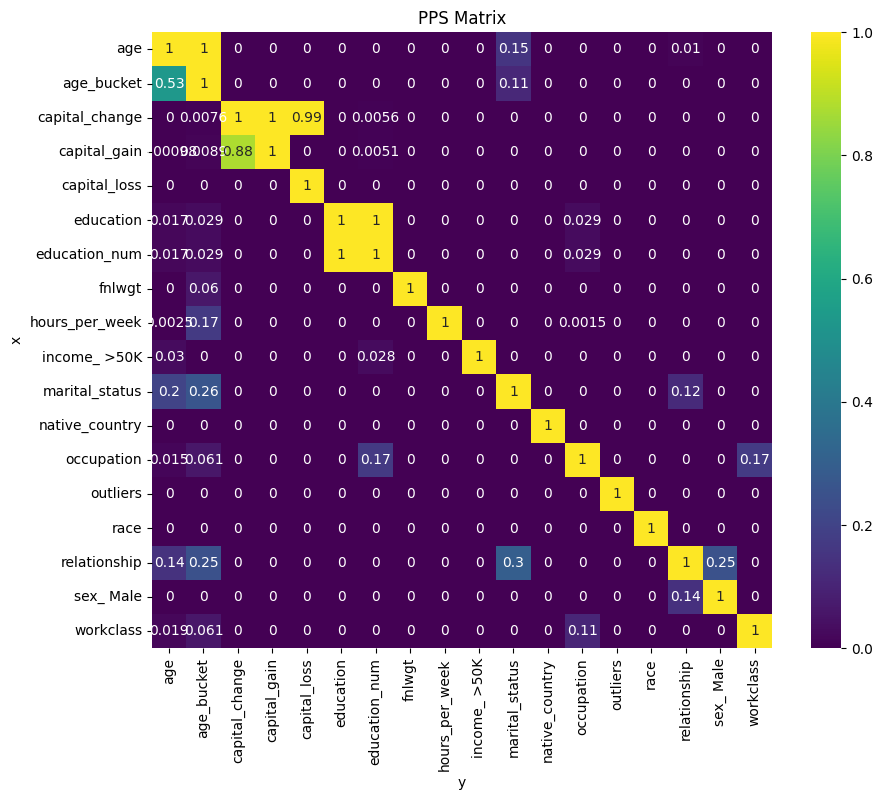

In [13]:
# Predictive Power Score (PPS) for feature selection
pps_matrix = pps.matrix(df)
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), cmap="viridis", annot=True, cbar=True)
plt.title('PPS Matrix')
plt.show()


<ipython-input-14-185ca5e88d46>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")


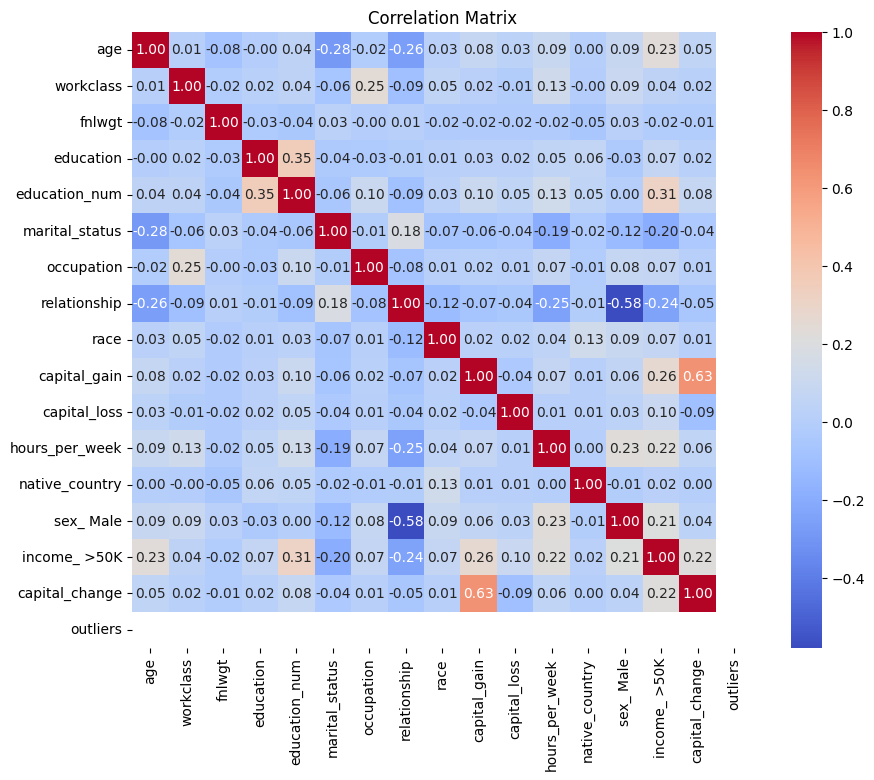

In [14]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
### Insights ###
print("\n### Insights ###")
print("1. Scaling: Standard scaling normalizes features by removing the mean and scaling to unit variance, beneficial for algorithms that rely on distance metrics. Min-max scaling rescales features to a [0,1] range, useful for features with known bounds or non-normally distributed data.")
print("\n2. Encoding Techniques: One-Hot Encoding expands feature space but can lead to high-dimensional data. Label Encoding preserves order but may introduce unintended ordinal relationships. One-Hot is preferable for nominal data, while Label Encoding is useful for high-cardinality categorical features.")
print("\n3. Feature Engineering: Created 'capital_change' to capture net capital gain/loss and 'age_bucket' to group age into buckets for demographic insights.")
print("\n4. Outliers: Outliers can skew model performance, particularly for distance-based algorithms. Isolation Forest identified and removed outliers to improve model reliability.")
print("\n5. PPS Analysis: PPS provides non-linear relationships between features, supplementing the correlation matrix by identifying associations missed by linear correlation.")



### Insights ###
1. Scaling: Standard scaling normalizes features by removing the mean and scaling to unit variance, beneficial for algorithms that rely on distance metrics. Min-max scaling rescales features to a [0,1] range, useful for features with known bounds or non-normally distributed data.

2. Encoding Techniques: One-Hot Encoding expands feature space but can lead to high-dimensional data. Label Encoding preserves order but may introduce unintended ordinal relationships. One-Hot is preferable for nominal data, while Label Encoding is useful for high-cardinality categorical features.

3. Feature Engineering: Created 'capital_change' to capture net capital gain/loss and 'age_bucket' to group age into buckets for demographic insights.

4. Outliers: Outliers can skew model performance, particularly for distance-based algorithms. Isolation Forest identified and removed outliers to improve model reliability.

5. PPS Analysis: PPS provides non-linear relationships between features, s